In [5]:
import pandas as pd
import numpy as np

dataLocation = 'Sample_Code/8365OS_04_Codes/data/SMSSpamCollection'

df = pd.read_csv(dataLocation, delimiter='\t', header=None)
print (df.head())
print()
print ('Number of spam messages:', df[df[0] == 'spam'][0].count())
print ('Number of ham messages:', df[df[0] == 'ham'][0].count())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Number of spam messages: 747
Number of ham messages: 4825


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

df = pd.read_csv(dataLocation, delimiter='\t', header=None)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])

In [17]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [41]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
for i, prediction in enumerate(predictions[:5]):
    print ('Prediction: %s. Message: %s' % (prediction, X_test_raw[i]))

KeyError: 0

## Binary classi cation performance metrics

[[4 1]
 [2 3]]


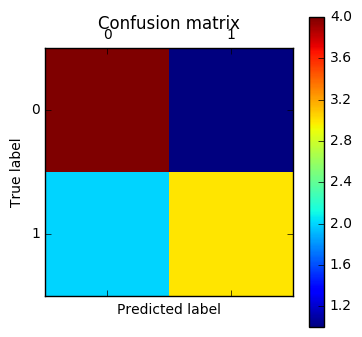

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Accuracy

Accuracy measures a fraction of the classi er's predictions that are correct.

In [43]:
from sklearn.metrics import accuracy_score
y_pred, y_true = [0, 1, 1, 0], [1, 1, 1, 1]
print ('Accuracy:', accuracy_score(y_true, y_pred))

Accuracy: 0.5


In [45]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

df = pd.read_csv('Sample_Code/8365OS_04_Codes/data/sms.csv')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
precisions = cross_val_score(classifier, X_train, y_train, cv=5, scoring='precision')
print ('Precision', np.mean(precisions), precisions)
recalls = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
print ('Recalls', np.mean(recalls), recalls)

Precision 0.988196243956 [ 0.97727273  0.97590361  1.          1.          0.98780488]
Recalls 0.673493253373 [ 0.74137931  0.70434783  0.63478261  0.5826087   0.70434783]


## Calculating the F1 measure

In [47]:
f1s = cross_val_score(classifier, X_train, y_train, cv=5, scoring='f1')
print ('F1: ', np.mean(f1s), f1s)

F1:  0.799302715882 [ 0.84313725  0.81818182  0.77659574  0.73626374  0.82233503]


## ROC AUC

- A ***Receiver Operating Characteristic***, or ROC curve, visualizes a classi er's performance. 

> The ROC curve is insensitive to data sets with unbalanced class proportions and it illustrates the classifier's performance for all values of the discrimination threshold. ROC curves plot the classifier's recall against its fall-out (F).

> F = (TN + FP)

- ***AUC*** is the area under the ROC curve; it reduces the ROC curve to a single value, which represents the expected performance of the classifier.

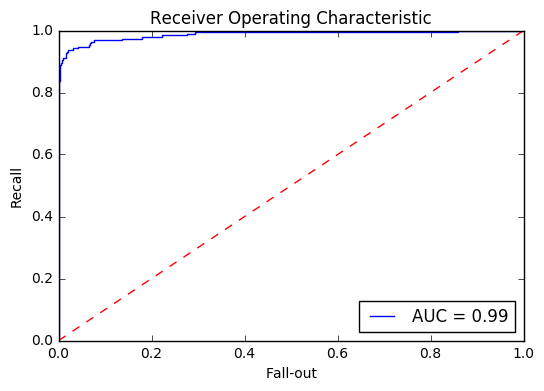

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('Sample_Code/8365OS_04_Codes/data/sms.csv')
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['message'], df['label'])
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

predictions = classifier.predict_proba(X_test)
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1])
roc_auc = auc(false_positive_rate, recall)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

## Tuning models with grid search

***Hyperparameters*** are parameters of the model that are not learned.

***Grid search*** is a common method to select the hyperparameter values that produce the best model.

> Grid search is a common method to select the hyperparameter values that produce the best model. Grid search takes a set of possible values for each hyperparameter that should be tuned, and evaluates a model trained on each element of the Cartesian product of the sets.

> Grid search is an exhaustive search that trains and evaluates a model for each possible combination of the hyperparameter values supplied by the developer.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

pipeline = Pipeline([
   ('vect', TfidfVectorizer(stop_words='english')),
   ('clf', LogisticRegression())
])

parameters = {
   'vect__max_df': (0.25, 0.5, 0.75),
   'vect__stop_words': ('english', None),
   'vect__max_features': (2500, 5000, 10000, None),
   'vect__ngram_range': ((1, 1), (1, 2)),
   'vect__use_idf': (True, False),
   'vect__norm': ('l1', 'l2'),
   'clf__penalty': ('l1', 'l2'),
   'clf__C': (0.01, 0.1, 1, 10),
}

if __name__ == "__main__":
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
    df = pd.read_csv('Sample_Code/8365OS_04_Codes/data/sms.csv')
    X, y, = df['message'], df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    grid_search.fit(X_train, y_train)
    
    print ('Best score: %0.3f' % grid_search.best_score_)
    print ('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    predictions = grid_search.predict(X_test)
    print ('Accuracy:', accuracy_score(y_test, predictions))
    print ('Precision:', precision_score(y_test, predictions))
    print ('Recall:', recall_score(y_test, predictions))

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


/Users/AdamLiu/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/AdamLiu/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Paralle

Best score: 0.984
Best parameters set:
	clf__C: 10
	clf__penalty: 'l2'
	vect__max_df: 0.5
	vect__max_features: 5000
	vect__ngram_range: (1, 2)
	vect__norm: 'l2'
	vect__stop_words: None
	vect__use_idf: True
Accuracy: 0.988522238164
Precision: 0.993939393939
Recall: 0.916201117318


## Multi-class classification

The goal of multi-class classification is to assign an instance to one of the set of classes.

scikit-learn uses a strategy called ***one-vs.-all***, or ***one-vs.-the-rest***, to support multi-classficlassi cation.

*LogisticRegression* supports multi-class classi cation using the one-versus-all strategy out of the box.

In [6]:
import pandas as pd
df = pd.read_csv('Sample_Code/8365OS_04_Codes/data/train.tsv', header=0, delimiter='\t')
print (df.count())
print()
print (df.head())

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


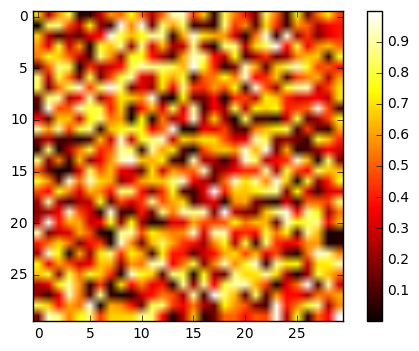

In [12]:
import numpy as np
import matplotlib.pyplot as plt

image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()
plt.show()

In [14]:
a = 1
a + 1
a += 1
a

2